# Grouping, Visualizing, and Describing Data in Python 
### Part A: Aggregating and Grouping with Pandas 
### Required Libraries 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [37]:
# Loading dataset

df=pd.read_csv(r'datasets\retail_data.csv')
df.head()

,region,product_category,sales_amount,quantity_sold,month
0,East,Clothing,105.33,1,May
1,West,Home,59.94,9,Feb
2,North,Electronics,111.41,1,Mar
3,East,Electronics,118.32,3,Mar
4,East,Electronics,116.79,8,Apr


## Basic Grouping with group by() 
 


In [43]:
# Group by region and sum sales 
total_sales_by_region = df.groupby('region')['sales_amount'].sum() 
print(total_sales_by_region) 


region
East     7827.29
North    7862.64
South    6916.63
West     8583.18
Name: sales_amount, dtype: float64


In [50]:
# sales per product_catergorey
total_sales_by_product_category = df.groupby('product_category')['sales_amount'].sum() 
print(total_sales_by_product_category) 


product_category
Books          5295.19
Clothing       8370.65
Electronics    9217.31
Home           8306.59
Name: sales_amount, dtype: float64


## Aggregation Functions 
Different questions require different aggregation functions: 


In [51]:
# Multiple aggregations on the same group 

region_summary = df.groupby('region')['sales_amount'].agg([ 
'sum', # Total sales 
'mean', # Average sales 
'count', # Number of transactions 
'min', # Lowest sale 
'max' # Highest sale 
]) 

print(region_summary)


            sum        mean  count    min     max
region                                           
East    7827.29  101.653117     77  34.04  175.81
North   7862.64  106.251892     74  49.94  173.66
South   6916.63  101.715147     68  43.31  168.97
West    8583.18  105.965185     81  14.54  164.90


##  Advanced Grouping Techniques Multiple Column 

### Grouping 

In [57]:
# Group by both region and category 

detailed_summary = sales_data.groupby(['region', 'category'])['sales_amount'].agg(['sum', 'mean'])

print(detailed_summary) 



                     sum    mean
region category                 
East   Electronics  2200  2200.0
       Home         1100  1100.0
North  Electronics  1500  1500.0
       Home          900   900.0
South  Clothing      800   800.0
       Electronics  1800  1800.0
West   Clothing     1200  1200.0
       Electronics  1600  1600.0


### Custom Aggregations 


In [59]:
# Create custom aggregation functions

def sales_range(x): 
   return x.max() - x.min() 
   custom_agg = sales_data.groupby('region')['sales_amount'].agg({ 
  'total': 'sum', 
  'average': 'mean', 
  'range': sales_range 
}) 
    


In [ ]:
custom_agg = sales_data.groupby('region')['sales_amount'].agg(['sum','mean'])

 Pivot Tables: Your Data's Best Friend 
Pivot tables are perfect for cross-tabular analysis: 


In [64]:
# Create a pivot table: region vs category 

pivot_sales = sales_data.pivot_table( 
values='sales_amount', 
index='month', 
columns='region', 
aggfunc='sum', 
fill_value=0    
) 

print(pivot_sales)


region  East  North  South  West
month                           
Feb     1100    900   1800  1600
Jan     2200   1500    800  1200


### Ranking and Sorting 

In [23]:
# Sort regions by total sales (descending)

top_regions = sales_data.groupby('region')['sales_amount'].sum().sort_values(ascending=False) 

print("Top performing regions:") 
print(top_regions) 




Top performing regions:
region
East     3300
West     2800
South    2600
North    2400
Name: sales_amount, dtype: int64


In [68]:
# Top 3 categories by average sales 

top_categories = df.groupby('product_category')['sales_amount'].mean().nlargest(3)

print("\nTop 3 categories by average sales:") 
top_categories 



Top 3 categories by average sales:


product_category
Home           107.877792
Electronics    105.946092
Clothing       102.081098
Name: sales_amount, dtype: float64

#  Practice Exercises - Part A 
#### Exercise 1: Basic Grouping 


In [26]:
# 1. Total quantity sold by region

total_quantity_by_region = sales_data.groupby('region')['quantity_sold'].sum()
print("Total quantity sold by region:")
print(total_quantity_by_region)

Total quantity sold by region:
region
East     19
North     9
South    17
West     14
Name: quantity_sold, dtype: int64


In [27]:
# 2. Average sales amount by category

avg_sales_by_category = sales_data.groupby('category')['sales_amount'].mean()
print("\nAverage sales amount by category:")
print(avg_sales_by_category)


Average sales amount by category:
category
Clothing       1000.0
Electronics    1775.0
Home           1000.0
Name: sales_amount, dtype: float64


In [28]:
# 3. Count of transactions by month

transactions_by_month = sales_data.groupby('month').size()
print("\nCount of transactions by month:")
print(transactions_by_month)


Count of transactions by month:
month
Feb    4
Jan    4
dtype: int64


 #### Exercise 2: Advanced Pivot Table 


In [32]:
# Create pivot table with totals

pivot_with_totals = sales_data.pivot_table(
    values='sales_amount',
    index='region',
    columns='month',
    aggfunc='sum',
    fill_value=0,
    margins=True,
    margins_name='Total'
)
print("Pivot table with totals:")
print(pivot_with_totals) 


Pivot table with totals:
month    Feb   Jan  Total
region                   
East    1100  2200   3300
North    900  1500   2400
South   1800   800   2600
West    1600  1200   2800
Total   5400  5700  11100


#### Exercise 3: Top Performers 


In [33]:
# Top 2 region-category combinations by total sales

top_combinations = sales_data.groupby(['region', 'category'])['sales_amount'].sum().nlargest(2)
print("Top 2 region-category combinations by sales:")
print(top_combinations)

Top 2 region-category combinations by sales:
region  category   
East    Electronics    2200
South   Electronics    1800
Name: sales_amount, dtype: int64


#  Part B: Visualizing Data with Matplotlib & Seaborn 


## The Art of Data Visualization 


### Matplotlib Basics 
#### Line Plots: Perfect for Trends Over Time 


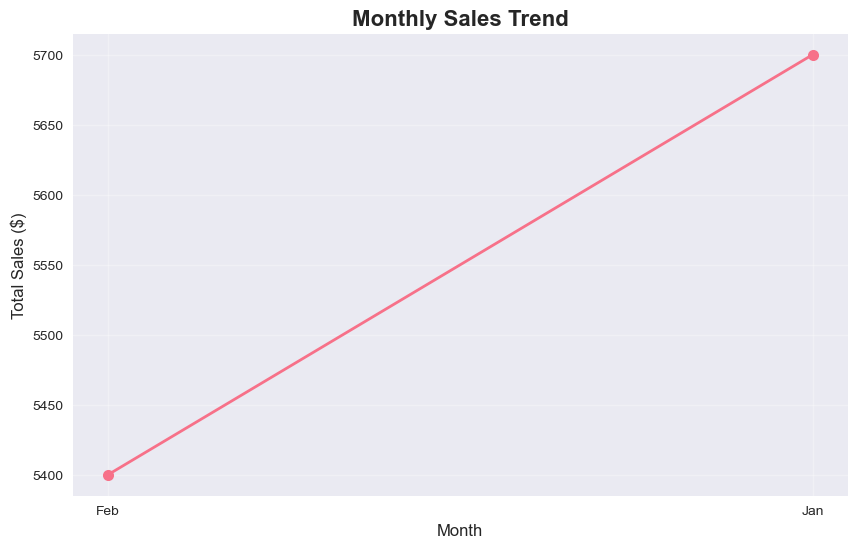

In [34]:
# Monthly sales trend 

monthly_sales = sales_data.groupby('month')['sales_amount'].sum() 
plt.figure(figsize=(10, 6)) 
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, markersize=8) 
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold') 
plt.xlabel('Month', fontsize=12) 
plt.ylabel('Total Sales ($)', fontsize=12) 
plt.grid(True, alpha=0.3) 
plt.show()


#### Bar Charts: Compare Categories

Text(0, 0.5, 'Total Sales ($)')

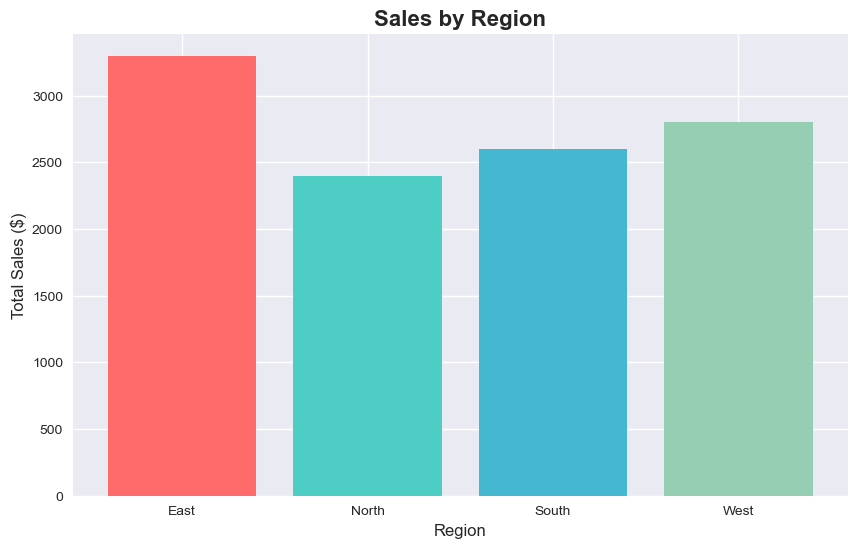

In [36]:
# Sales by region 

region_sales = sales_data.groupby('region')['sales_amount'].sum() 
plt.figure(figsize=(10, 6)) 
bars = plt.bar(region_sales.index, region_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Sales by Region', fontsize=16, fontweight='bold') 
plt.xlabel('Region', fontsize=12) 
plt.ylabel('Total Sales ($)', fontsize=12)

Text(0, 0.5, 'Total Sales ($)')

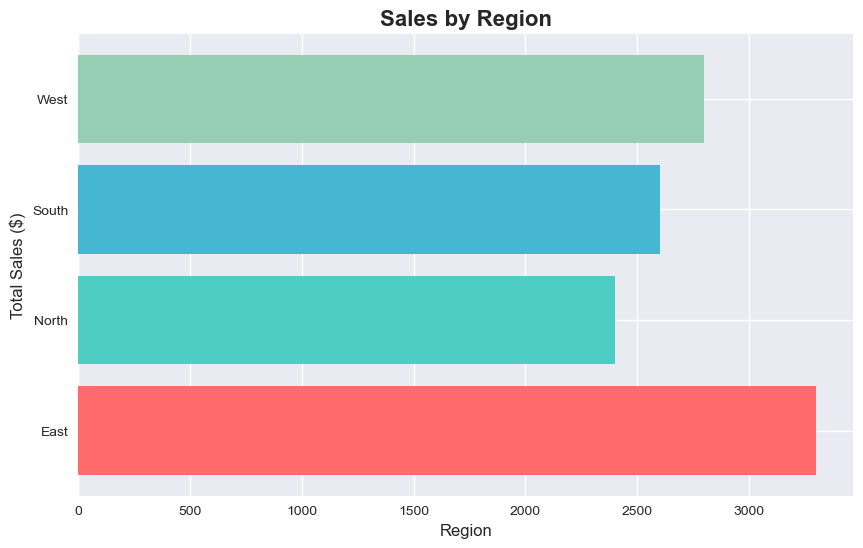

In [70]:
# Sales by region 

region_sales = sales_data.groupby('region')['sales_amount'].sum() 
plt.figure(figsize=(10, 6)) 
bars = plt.barh(region_sales.index, region_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Sales by Region', fontsize=16, fontweight='bold') 
plt.xlabel('Region', fontsize=12) 
plt.ylabel('Total Sales ($)', fontsize=12)

#  Seaborn: Beautiful Plots Made Easy 
#### Count Plots: Frequency of Categories 


C:\Users\len\AppData\Local\Temp\ipykernel_5812\520458019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales_data, x='category', palette='viridis')


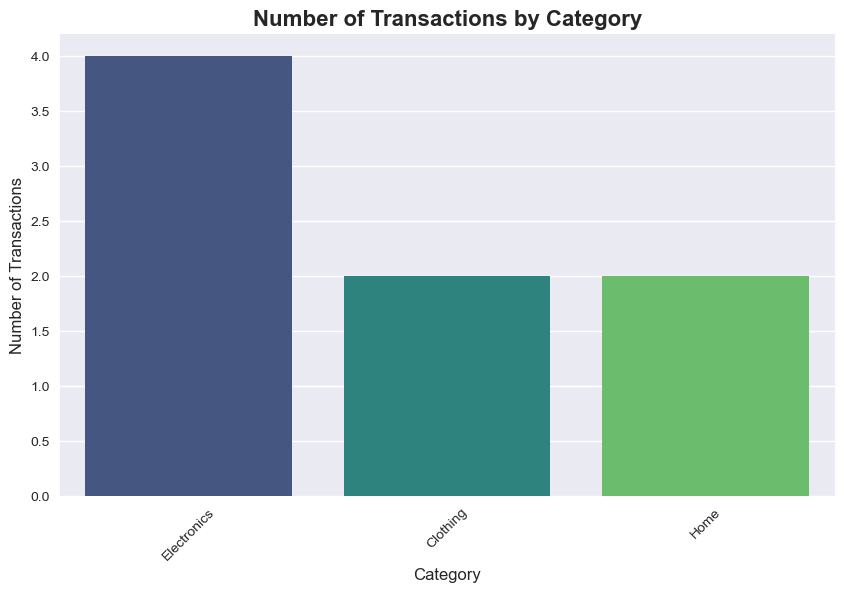

In [38]:
# How many transactions per category?

plt.figure(figsize=(10, 6)) 
sns.countplot(data=sales_data, x='category', palette='viridis') 
plt.title('Number of Transactions by Category', fontsize=16, fontweight='bold') 
plt.xlabel('Category', fontsize=12) 
plt.ylabel('Number of Transactions', fontsize=12) 
plt.xticks(rotation=45) 
plt.show() 


#### Box Plots: Understand Distributions and Outliers 


C:\Users\len\AppData\Local\Temp\ipykernel_5812\474118514.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_data, x='region', y='sales_amount', palette='Set2')


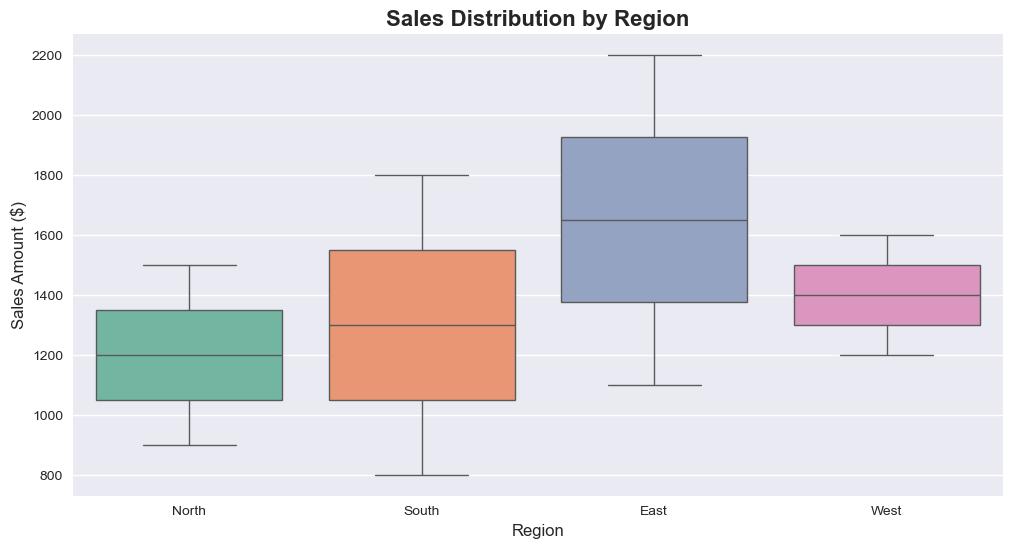

In [39]:
# Sales distribution by region 

plt.figure(figsize=(12, 6)) 
sns.boxplot(data=sales_data, x='region', y='sales_amount', palette='Set2') 
plt.title('Sales Distribution by Region', fontsize=16, fontweight='bold') 
plt.xlabel('Region', fontsize=12) 
plt.ylabel('Sales Amount ($)', fontsize=12) 
plt.show()


#### Histograms: Show Data Distribution 


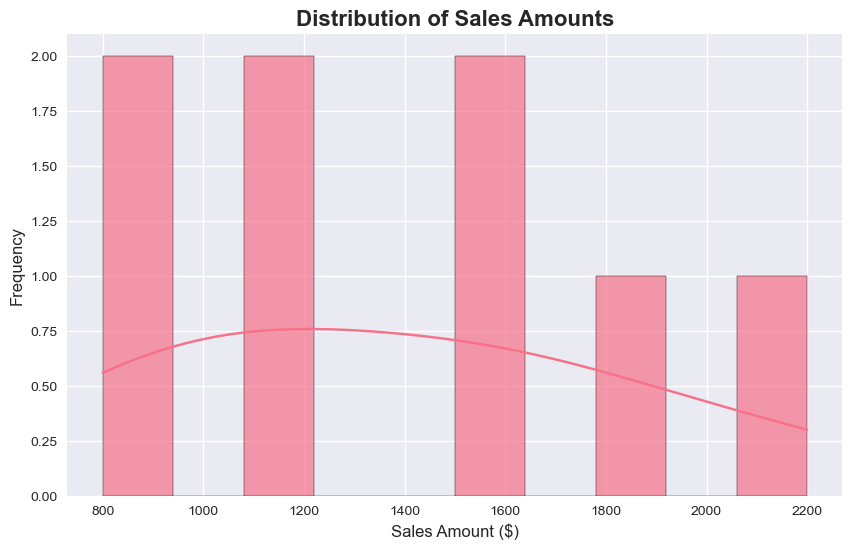

In [40]:
# Distribution of sales amounts 

plt.figure(figsize=(10, 6)) 
sns.histplot(data=sales_data, x='sales_amount', bins=10, kde=True, alpha=0.7)
plt.title('Distribution of Sales Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Sales Amount ($)', fontsize=12) 
plt.ylabel('Frequency', fontsize=12) 
plt.show() 


#### Scatter Plots: Relationships Between Variables 


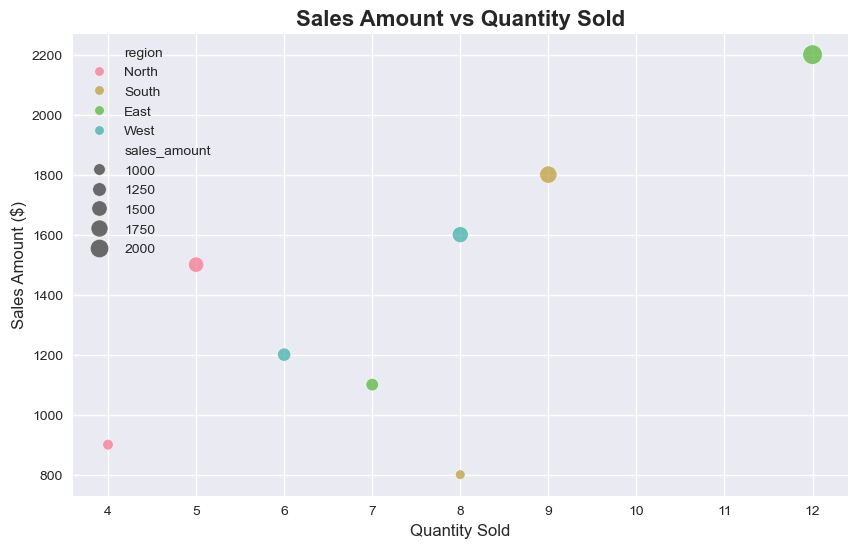

In [42]:
# Sales vs Quantity relationship

plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=sales_data, x='quantity_sold', y='sales_amount', hue='region', size='sales_amount', sizes=(50, 200), alpha=0.7)
plt.title('Sales Amount vs Quantity Sold', fontsize=16, fontweight='bold') 
plt.xlabel('Quantity Sold', fontsize=12) 
plt.ylabel('Sales Amount ($)', fontsize=12) 
plt.show() 


#### Heatmaps: Correlation and Pivot Data 


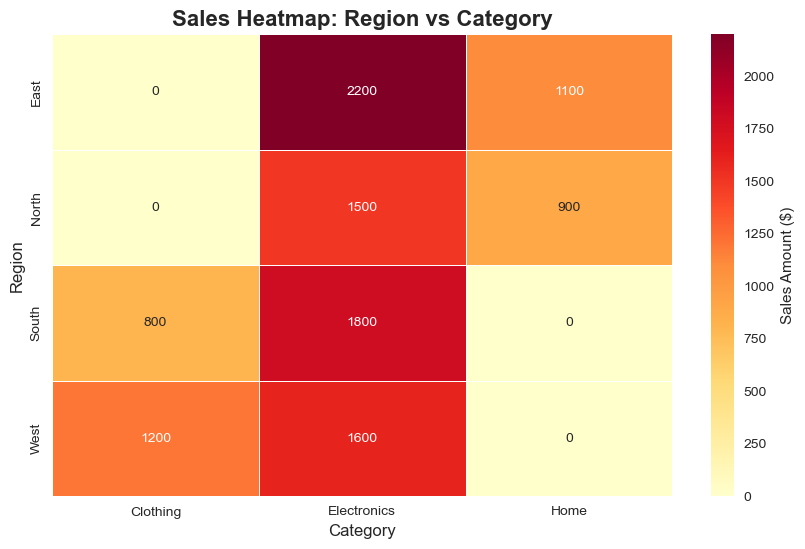

In [65]:
# Create a pivot table for heatmap 

pivot_for_heatmap = sales_data.pivot_table( 
values='sales_amount', 
index='region', 
columns='category', 
aggfunc='sum', 
fill_value=0 
) 
# Create the heatmap 
plt.figure(figsize=(10, 6)) 
sns.heatmap(pivot_for_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Sales Amount ($)'}) 
plt.title('Sales Heatmap: Region vs Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12) 
plt.ylabel('Region', fontsize=12) 
plt.show()


#  Practice Exercises - Part B 
#### Exercise 1: Student Performance Analysis 


In [71]:
# Create sample student data

student_data = pd.DataFrame({ 
'grade_level': ['9th', '10th', '11th', '12th'] * 25, 
'math_score': np.random.normal(75, 15, 100), 
'reading_score': np.random.normal(80, 12, 100), 'subject': ['Math', 'Reading'] * 50 
}) 


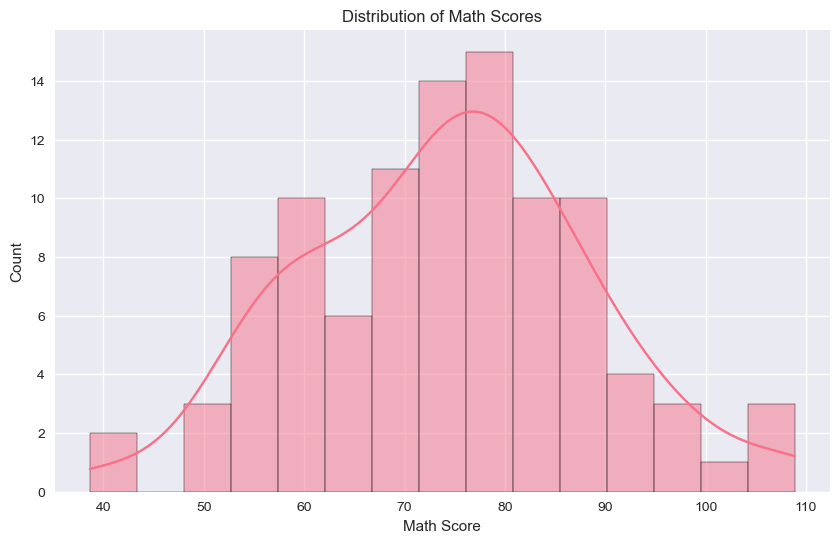

In [72]:
# 1. Histogram of math scores

plt.figure(figsize=(10, 6))
sns.histplot(data=student_data, x='math_score', bins=15, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.show()

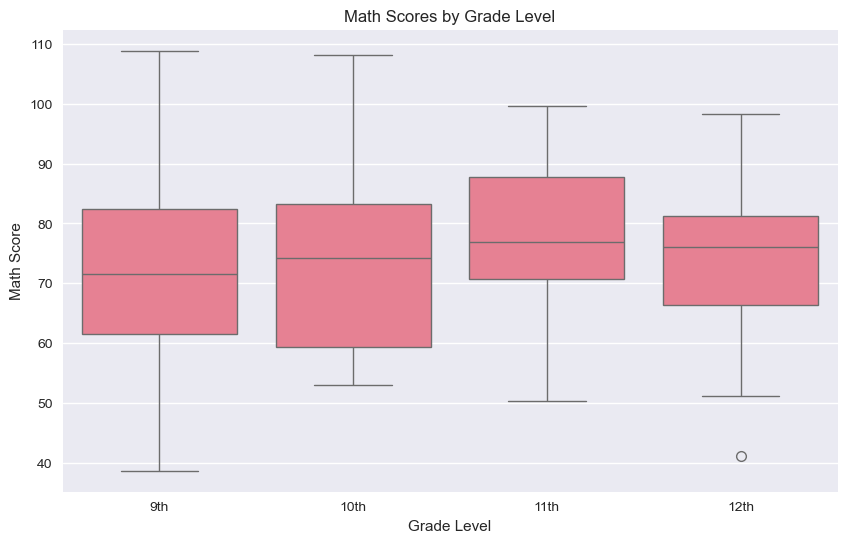

In [73]:
# 2. Box plot of scores by grade level

plt.figure(figsize=(10, 6))
sns.boxplot(data=student_data, x='grade_level', y='math_score')
plt.title('Math Scores by Grade Level')
plt.xlabel('Grade Level')
plt.ylabel('Math Score')
plt.show()

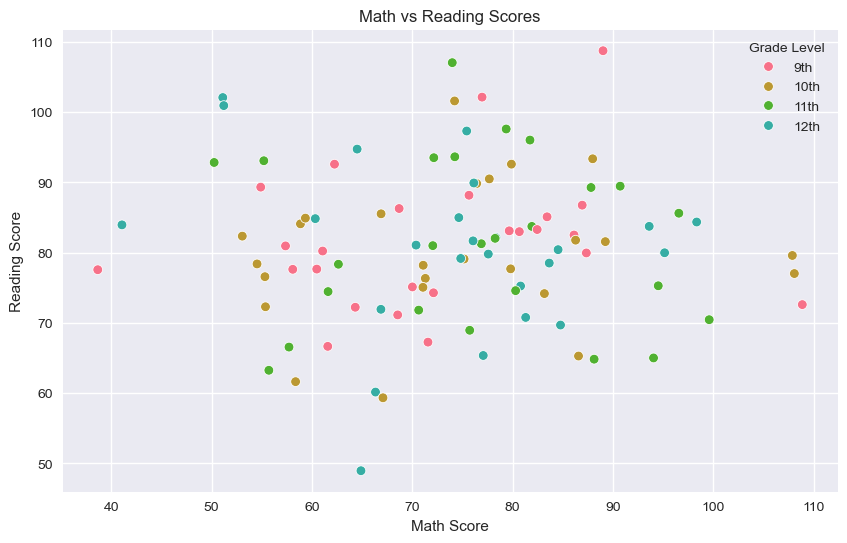

In [74]:
# 3. Scatter plot of math vs reading scores

plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='math_score', y='reading_score', hue='grade_level')
plt.title('Math vs Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Grade Level')
plt.show()

# Exercise 2: Sales Dashboard 


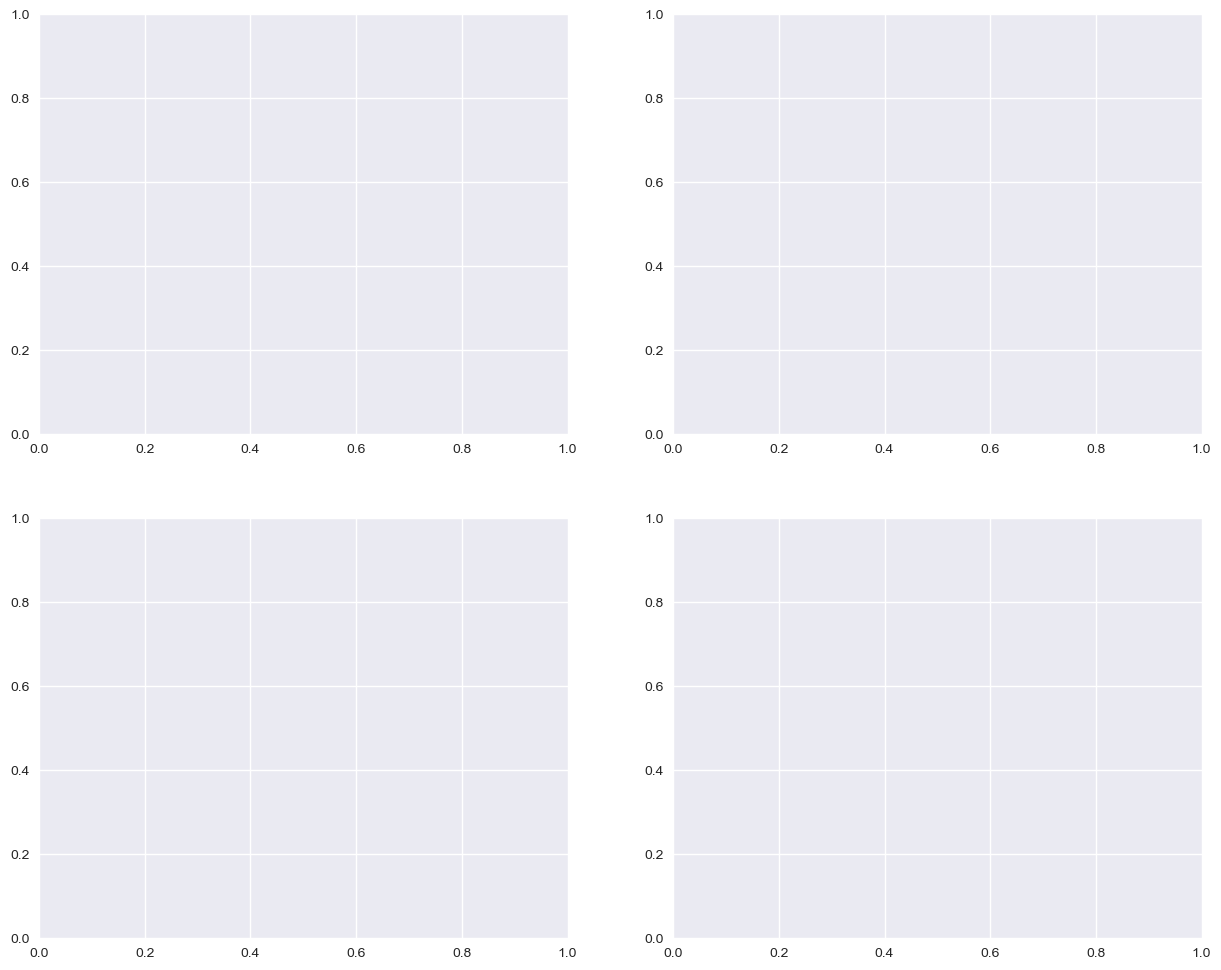

In [75]:
# Create 2x2 subplot dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))


In [76]:
# 1. Bar chart of sales by region
region_sales = sales_data.groupby('region')['sales_amount'].sum()
axes[0,0].bar(region_sales.index, region_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0,0].set_title('Sales by Region')
axes[0,0].set_xlabel('Region')
axes[0,0].set_ylabel('Total Sales ($)')

Text(4.444444444444452, 0.5, 'Total Sales ($)')

In [79]:
# 2. Line plot of monthly trends
monthly_sales = sales_data.groupby('month')['sales_amount'].sum()
axes[0,1].plot(monthly_sales.index, monthly_sales.values, marker='o')
axes[0,1].set_title('Monthly Sales Trend')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Total Sales ($)')
axes[0,1].grid(True, alpha=0.3)

In [80]:
# 3. Pie chart of category distribution
category_sales = sales_data.groupby('category')['sales_amount'].sum()
axes[1,0].pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
axes[1,0].set_title('Sales Distribution by Category')

Text(0.5, 1.0, 'Sales Distribution by Category')

In [82]:
# 4. Heatmap of region vs category
pivot_for_heatmap = sales_data.pivot_table(
    values='sales_amount',
    index='region',
    columns='category',
    aggfunc='sum',
    fill_value=0
)
sns.heatmap(pivot_for_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Sales Heatmap: Region vs Category')

plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

# Part C: Descriptive Statistics & Outlier Detection
## Understanding Your Data Through Numbers 


In [84]:
# Basic descriptive statistics 
print("Sales Amount Statistics:") 
print(f"Mean: ${sales_data['sales_amount'].mean():.2f}") 
print(f"Median: ${sales_data['sales_amount'].median():.2f}") 
print(f"Mode: ${sales_data['sales_amount'].mode().iloc[0]:.2f}") 

Sales Amount Statistics:
Mean: $1387.50
Median: $1350.00
Mode: $800.00


In [85]:
# Complete statistical summary 
print("\nComplete Summary:") 
print(sales_data['sales_amount'].describe()) 



Complete Summary:
count       8.000000
mean     1387.500000
std       476.407689
min       800.000000
25%      1050.000000
50%      1350.000000
75%      1650.000000
max      2200.000000
Name: sales_amount, dtype: float64


### Variability: How Spread Out Is Your Data? 


In [89]:
# Measures of variability 
print("Variability Measures:") 
print(f"Standard Deviation: ${sales_data['sales_amount'].std():.2f}") 
print(f"Variance: ${sales_data['sales_amount'].var():.2f}") 
print(f"Range: ${sales_data['sales_amount'].max() - sales_data['sales_amount'].min():.2f}") 

Variability Measures:
Standard Deviation: $476.41
Variance: $226964.29
Range: $1400.00


In [90]:
# Quartiles and IQR 
Q1 = sales_data['sales_amount'].quantile(0.25) 
Q3 = sales_data['sales_amount'].quantile(0.75) 
IQR = Q3 - Q1 
print(f"IQR: ${IQR:.2f}")


IQR: $600.00


###  Categorical Data Analysis 

In [91]:
# Analyze categorical variables 
print("Region Analysis:") 
print(sales_data['region'].value_counts()) 
print(f"\nUnique regions: {sales_data['region'].nunique()}") 


Region Analysis:
region
North    2
South    2
East     2
West     2
Name: count, dtype: int64

Unique regions: 4


In [92]:
# Proportions 
print("\nRegion Proportions:") 
print(sales_data['region'].value_counts(normalize=True)) 



Region Proportions:
region
North    0.25
South    0.25
East     0.25
West     0.25
Name: proportion, dtype: float64


###  Outlier Detection: Finding the Unusual 
 ### Method 1: IQR Method (Most Common) 


In [95]:
def detect_outliers_iqr(data, column): 
 
  "Detect outliers using the IQR method" 
   
  Q1 = data[column].quantile(0.25) 
  Q3 = data[column].quantile(0.75) 
  IQR = Q3 - Q1 


In [96]:
# Define outlier bounds 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 


In [98]:
# Find outliers 
outliers = data[([column] < lower_bound) | (data[column] > upper_bound)] 
print(f"Outlier bounds: ${lower_bound:.2f} to ${upper_bound:.2f}") 
print(f"Number of outliers: {len(outliers)}") 
return outliers, lower_bound, upper_bound 


NameError: name 'data' is not defined